In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

# Tutorial

## Part 1

### Question

Consider the function 

$$f(x,y) = e^{-y}\sin(x)$$

Plot 
1. $f(x, 1)$ vs. $x$ for $x$ in the interval $(-4\pi, 4\pi)$
2. $f(\pi/2, y)$ vs. $y$ for $y$ in the interval $(-3, 3)$

### Answer

The key is to first define a python function which represents $f(x,y)$. Note the use of np.exp and np.sin; at the top I imported numpy as np, so np.___ represents a function from the library of numpy.

In [2]:
def func(x,y):
    return np.exp(-y)*np.sin(x)

Now we define an array of values from $-4\pi$ to $4\pi$. The easiest way to do this is to use np.linspace or np.arange. They work slightly differently:

In [3]:
# Option 1
x = np.linspace(-4*np.pi, 4*np.pi, 1000)
# Option 2
x = np.arange(-4*np.pi, 4*np.pi, 0.01)

The first option creates an array of 1000 equally spaced $x$ points from $-4\pi$ to $4\pi$. The second option creates $x$ points with a spacing of $0.01$ to go from $-4\pi$ to $4\pi$. 

Now we can plug this input array into our function to get an output array. Note that np.sin and np.exp can **take in arrays as arguments and output arrays**. This means that numpy computes $\sin(x_i)$ sequentially for every value $x_i$ in our array x, and then outputs a new array

In [4]:
x

array([-12.56637061, -12.55637061, -12.54637061, ...,  12.54362939,
        12.55362939,  12.56362939])

In [5]:
np.sin(x)

array([ 4.89858720e-16,  9.99983333e-03,  1.99986667e-02, ...,
       -2.27392686e-02, -1.27408840e-02, -2.74122529e-03])

Lets obtain the output for our function

In [6]:
f = func(x, 1)

Now we can plot $f$ vs. $x$ using matplotlib. Note that I imported the plotting model using **import matplotlib.pyplot as plt**, so anything of the form plt.____ is a function of matplotlib

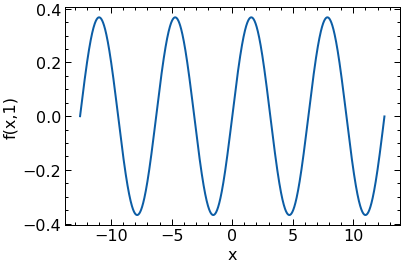

In [7]:
plt.plot(x, f) # Create a canvas and plot the data
plt.xlabel('x', fontsize=16) # Add an x-label and specify the font size
plt.ylabel('f(x,1)', fontsize=16) 
plt.show() # Show the plot in the jupyter notebook

Now lets plot $f(\pi/2, y)$ for y in the range (-3, 3).

In [8]:
y = np.linspace(-3,3,1000)
f = func(np.pi/2, y)

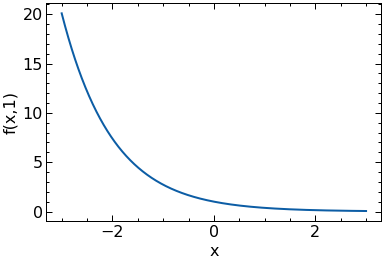

In [9]:
plt.plot(y,f)
plt.xlabel('x', fontsize=16) 
plt.ylabel('f(x,1)', fontsize=16) 
plt.show()

## Part 2

### Question
Consider the function

$$f(x,y) = \int_{0}^{2 \pi} \frac{\sin(\theta) \cdot (x-\cos(\theta))}{((x-\cos(\theta))^2+(y-\sin(\theta))^2)^{3/2}} d\theta $$

1. Write a program to find $f(x,y)$ for arbitrary valuea of $x$ and $y$
2. Plot $f(x,1/2)$ vs. $x$ for $x$ in the interval $(-2, 2)$

### Answer

Now our function is a little more complicated: we need to solve an integral to obtain our function. Lucky for us, python has plenty of numerical integration techniques embedded in numpy: **no need to solve integrals!** Lets slowly go through the proper method to solve integrals in python.

First we define an integrand function.

In [10]:
def integrand(theta, x, y):
    return (np.sin(theta)*(x-np.cos(theta)))/((x-np.cos(theta))**2+(y-np.sin(theta))**2)**(3/2) 

Note that the variable we want to integrate over **comes first in the arguments** (in this case $\theta$), followed by addition arguments $x$ and $y$. Next we use the scipy.integrate function **quad** to perform an integral. It works as follows:

In [11]:
quad(integrand, 0, 2*np.pi, args=(0.5,0.5))

(-1.3751291541611286, 1.4302285797862062e-08)

The first argument to quad is the integrand function. Then we specify the lower and upper bounds of the integral. Finally, the parameter **args** specifies any addition values to pass to the integrand function. In this case we are specifying the values of $x$ and $y$. The number of points in args depends on how many parameters the integrand function takes. If, for example, the integrand was defined as integrand(theta, x, y, z), then args would need to take in three points (instead of 2).

Now lets talk about what is returned by the quad function; two values are returned. The first is the value of the integral and the second is and estimate of the absolute error of the result. In this case, we only care about the first argument, but in scientific research it is often important to keep track of errors as well.

Now that we know how to integrate, we can define our function from the beginning of the problem. Note the "[0]" at the end of the quad(...) function; this means I am taking only the first return value (and not the error):

In [12]:
def func(x,y):
    return quad(integrand, 0, 2*np.pi, args=(x,y))[0]

Now I can solve the integral for arbitrary $x$ and $y$.

In [13]:
func(0.5,0.5)

-1.3751291541611286

Now lets plot $f(x,1/2)$ for $x$ in the range (-1/2,1/2)

In [14]:
x = np.linspace(-1/2, 1/2, 1000)
f = [func(xi, 0.5) for xi in x]

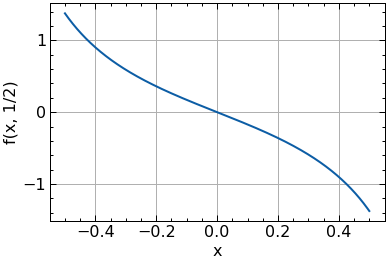

In [15]:
plt.plot(x,f)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x, 1/2)', fontsize=16)
plt.grid()

## Part 3

### Question

Consider the formula for the magnitude of the electric field from a point charge at the origin:

$$|\vec{E}| = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2} $$

Plot the magnitude of the electric field as a function of $x$ in the range $(-2R, 2R)$ when $y=R$ and $z=0$.

### Answer

The main purpose of this question is for you to realize that there are undefined variables ($q$, $R$) and we are asked to plot the electric field without knowing what their values are. Noting that

$$|\vec{E}| = \frac{1}{4 \pi \epsilon_0} \frac{q}{x^2+y^2} = \frac{1}{4 \pi \epsilon_0 R^2} \frac{q}{(x/R)^2+(y/R)^2} $$

it is possible to plot

$$\frac{4 \pi \epsilon_0 R^2}{q} |\vec{E}| = \frac{1}{(x/R)^2 + (y/R)^2} $$

for $(x/R)$ in the range (-2, 2) when $y/R=1$ instead. Even though the question says "plot the magnitude of the electric field" (which is technically $|\vec{E}|$), this cannot be done numerically, so you'll have to plot $4 \pi \epsilon_0 R^2 |\vec{E}|/q$ the instead. **This will show up in 3rd/4th/graduate courses, and in research all the time**. It is up to you to rearrange the variables to find **something** that you can plot numerically. 

In [16]:
def func(x_R, y_R):
    return 1/(x_R**2+y_R**2)

Now we use numpy to evaluate our function at all the given $x$ values

In [17]:
x_R = np.linspace(-2, 2, 1000)
f = func(x_R, 1)

And finally we plot:

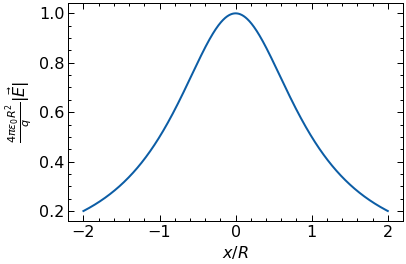

In [18]:
plt.plot(x_R, f)
plt.xlabel('$x/R$', fontsize=16)
plt.ylabel(r'$\frac{4 \pi \epsilon_0 R^2}{q}|\vec{E}|$', fontsize=16)
plt.show()

# Assignment

## Question

A charge density is given by

$$\rho(r, \theta, z) = \rho_0 \delta(r-R)\delta(z)\sin(\theta) $$

where $(r, \theta, z)$ are cylindrical coordinates. This charge density should be interpretted as a ring of charge where the top portion is positively charged and the bottom portion is negatively charged. Plot the x and y components of the electric field as a function of $x$ in the range $(-R/2, R/2)$ at $y=R/2$ and $z=0$. 

* Put each plot on a seperate canvas.
* *Hint: This question is very closely linked to the tutorial problems.*

## Answer

We have (where $\mathscr{r} = \vec{r} - \vec{r}'$)

\begin{align*}
4 \pi \epsilon_0 \vec{E} &= \iiint \frac{\rho(\vec{r}')}{|\mathscr{r}|^{3}}\vec{\mathscr{r}} d\tau \\
&= \iiint \frac{\rho_0 \sin(\theta')\delta(r'-R) \delta(z')}{((x-r'\cos\theta')^2+(y-r'\sin\theta')^2+(z-z')^2)^{3/2}} \begin{pmatrix}
           x-r'\cos(\theta') \\
           y-r'\sin\theta' \\
           z-z'
         \end{pmatrix}r'dr'd\theta'dz'\\
&= \int_{0}^{2 \pi} \frac{\rho_0 \sin(\theta')}{((x-R\cos\theta')^2+(y-R\sin\theta')^2+z^2)^{3/2}}\begin{pmatrix}
           x-R\cos(\theta') \\
           y-R\sin\theta' \\
           z
         \end{pmatrix} Rd\theta'       
\end{align*}

You are asked to consider both the x-component and the y-components of the electric field at $y=R/2$, $z=0$ and $x: -R/2 \to R/2$. For now we will just do the x-component. Note that we have unknown variables ($\rho_0$ and $R$) so we're going to have to plot something different then just $E_x$ itself (see tutorial question 3)

$$4 \pi \epsilon_0 E_x  = \int_{0}^{2 \pi} \frac{\rho_0 \sin(\theta')(xR-R^2\cos\theta')}{((x-R\cos\theta')^2+(y-R\sin\theta')^2+z^2)^{3/2}} d\theta'$$

We want to obtain things like $x/R$ and $y/R$ in the integral so we can perform a numerical integration when $y/R=1/2$ and $x/R: -1/2 \to 1/2$. The problem is we need to multiply the numerator of the integrand by $1/R^2$ and the denominator by $1/R^3$ to get our integral in this form. We can do this as long as we also multiply the left hand side of the expression by $R$. We also divide by $\rho_0$ to remove it from the integral. In this case we get

$$\left(\frac{4 \pi \epsilon_0 R}{\rho_0}\right) E_x  = \int_{0}^{2 \pi} \frac{\sin(\theta')((x/R)-\cos\theta')}{((x/R-\cos\theta')^2+(y/R-\sin\theta')^2+(z/R)^2)^{3/2}} d\theta'$$

Now we can numerically integrate the right hand side since we have numerical values for $x/R$, $y/R$ and $z/R$. 

In [19]:
def integrand(theta, x, y, z):
    return (np.sin(theta)*(x-np.cos(theta)))/((x-np.cos(theta))**2+(y-np.sin(theta))**2+z**2)**(3/2)
def integral(x,y,z):
    return quad(integrand, 0, 2*np.pi, args=(x,y,z))[0]

Get numerical arrays to plot.

In [20]:
x = np.linspace(-1/2, 1/2, 1000)
E_x = [integral(x_i, 1/2, 0) for x_i in x]

Do plotting.

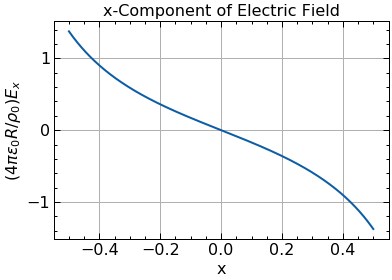

In [21]:
plt.plot(x,E_x)
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$(4 \pi \epsilon_0 R/\rho_0)E_x$', fontsize=16)
plt.title('x-Component of Electric Field', fontsize=16)
plt.grid()

## Aside

Note the following difference:

* Tutorial problem 3: Plot $\left(\frac{4 \pi \epsilon_0 R^2}{q}\right) \cdot \text{Electric Field}$
* Assignment: Plot $\left(\frac{4 \pi \epsilon_0 R}{\rho}\right) \cdot \text{Electric Field}$

Note that one of the out-front factors has an $R^2$ and one of them has an $R$. As you will see later, this is closely connected to the dipole electric field you will see in chapter 3 of Griffiths; since the ring of charge considered in the assignment has a net charge of zero with two "poles" (a positively charged side and a negatively charged side), it is a type of electric dipole.